## Name: Bharat Hegde

## Executive PG Programme in Machine Learning & AI - January 2023

## Housing Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Summary


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [4311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4312]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [4313]:
# summary of the dataset: 1460 rows, 81 columns, many null values
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4314]:
# head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [4315]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [4316]:
# correlation matrix
cor = housing_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

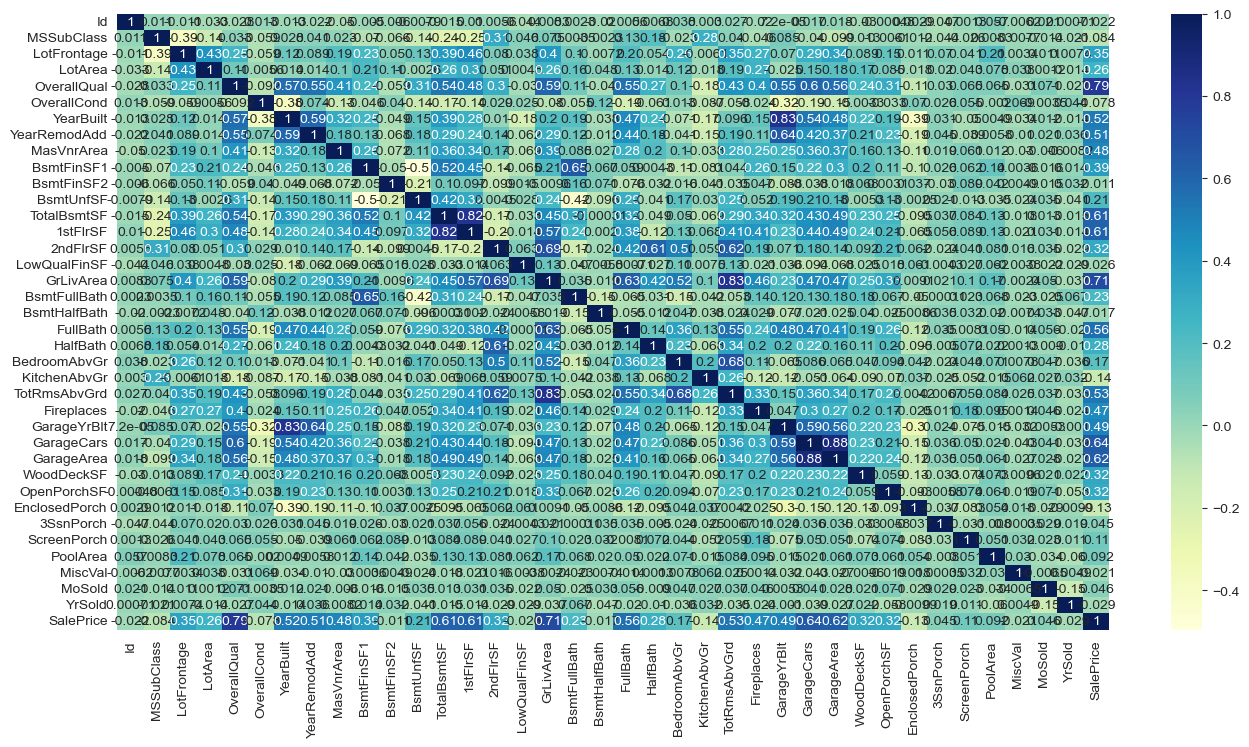

In [4317]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

-We see that Housing Price is reasonably correlated to some predictors like 
#### GrLivArea,1stFlrSF/TotalBsmtSF,OverallQual,GarageArea, GarageCars etc

-We see that some predictors are highly correlated ( GarageYrBlt and YearBuilt,  1stFloorSF and TotalBsmtSF ) hence some multi collenearity is expected

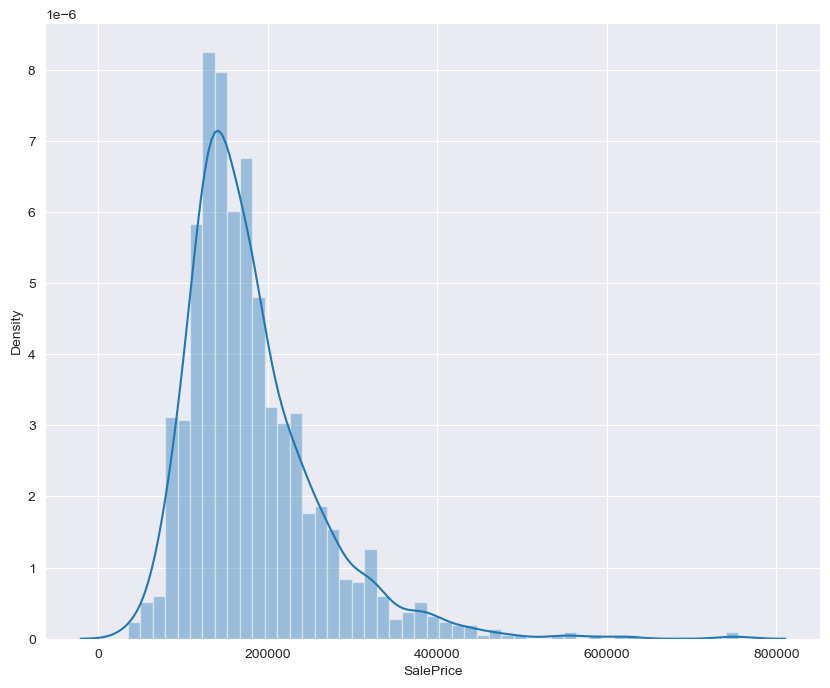

In [4318]:
## Let us analyse target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(housing['SalePrice']);

In [4319]:
## We will log transform the target variable to make it suitable for the Linear Regression
housing['SalePrice'] = np.log(housing['SalePrice'])


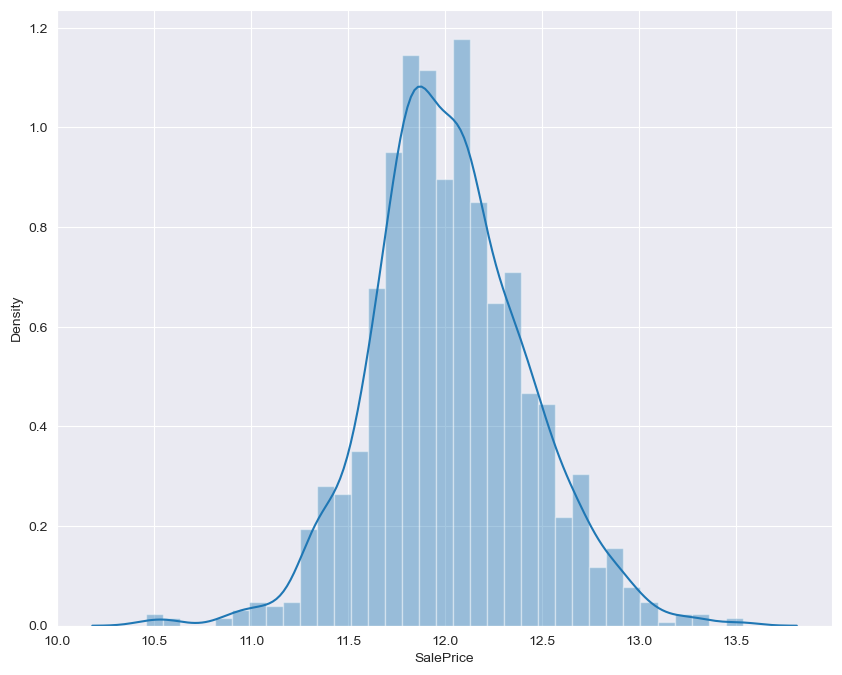

In [4320]:
#Double checking the target variable
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(housing['SalePrice']);

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

- We will drop the ID coulmn
- Lot of columns have missing values, we will try to reasonly fill the missing values, if missing values are too many and reasonable to use the column, we will drop the column


In [4321]:
#drop ID
housing = housing.drop(["Id"], axis=1)

In [4322]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4323]:
#For numeric values, fill with the mean
housing['LotFrontage'].fillna(int(housing['LotFrontage'].mean()), inplace=True)
housing['MasVnrArea'].fillna(int(housing['MasVnrArea'].mean()), inplace=True)
housing['GarageYrBlt'].fillna(int(housing['GarageYrBlt'].mean()), inplace=True)



In [4324]:
#For categorical values, fill with the reasonable values 
housing['Alley'].fillna('NA', inplace=True)
housing['MasVnrType'].fillna('None', inplace=True)
housing['BsmtQual'].fillna('NA', inplace=True)
housing['BsmtCond'].fillna('NA', inplace=True)
housing['BsmtExposure'].fillna('NA', inplace=True)
housing['BsmtFinType1'].fillna('NA', inplace=True)
housing['BsmtFinType2'].fillna('NA', inplace=True)
housing['Electrical'].fillna('SBrkr', inplace=True) ## since SBrkr had the highest occurance
housing['FireplaceQu'].fillna('NA', inplace=True)
housing['GarageType'].fillna('NA', inplace=True)
housing['GarageFinish'].fillna('NA', inplace=True)
housing['GarageQual'].fillna('NA', inplace=True)
housing['GarageCond'].fillna('NA', inplace=True)
housing['PoolQC'].fillna('NA', inplace=True)
housing['Fence'].fillna('NA', inplace=True)
housing['MiscFeature'].fillna('NA', inplace=True)

In [4325]:
# Checking again for non null values , and we see that now all null values are taken care of.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4326]:
## Create new column for the age of the house and drop old ones 
housing['houseAge'] = housing['YrSold'] - housing['YearBuilt']
housing = housing.drop(['YrSold', 'YearBuilt'], axis=1)

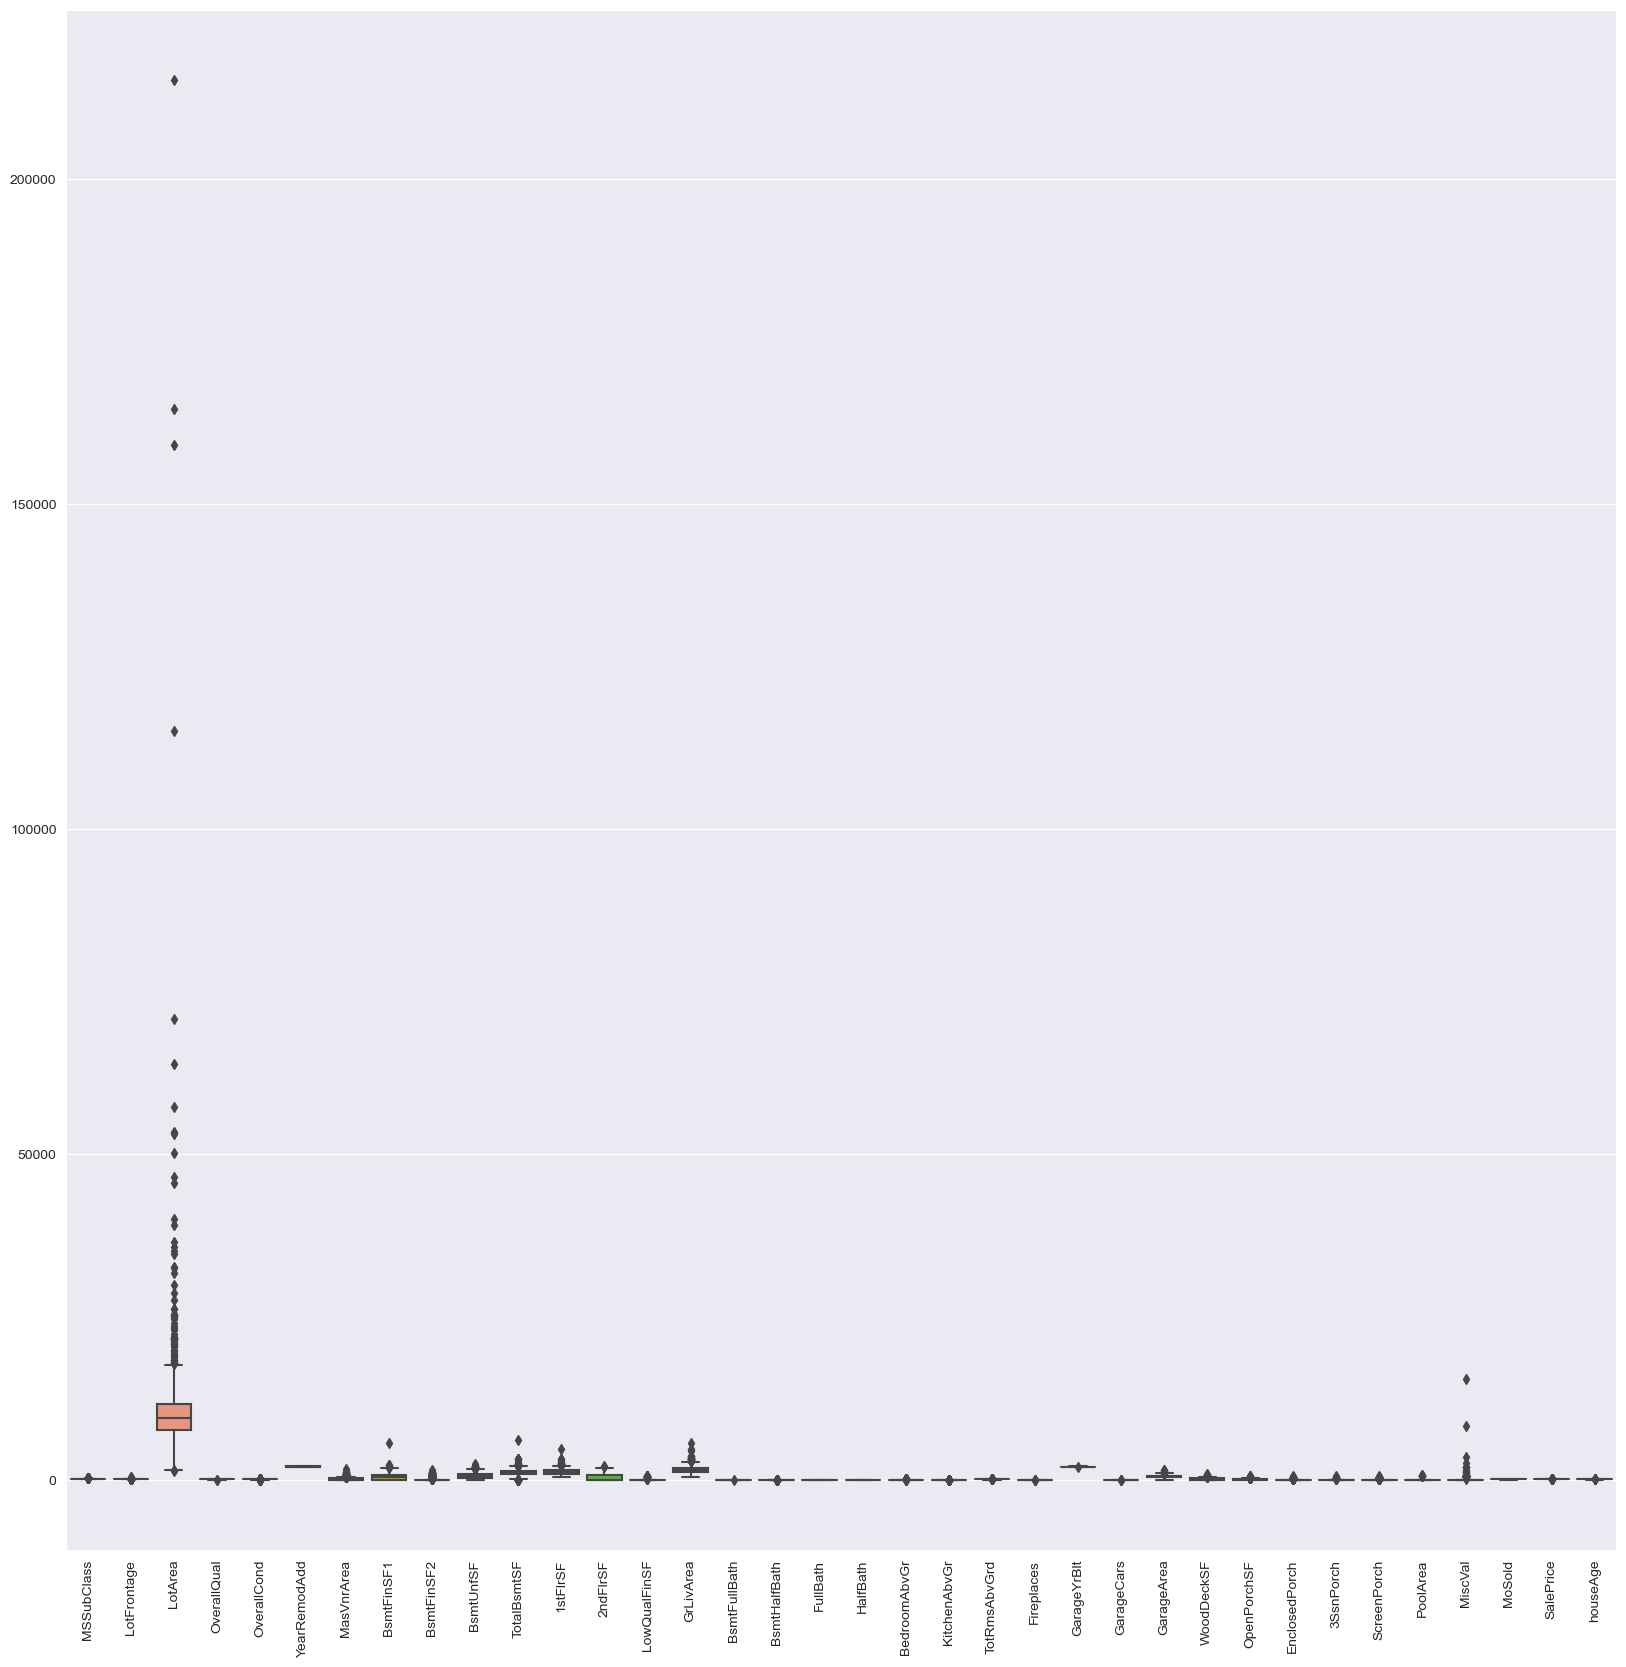

In [4327]:
# Treatmet for outliers
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=[20,20])
plt.xticks(rotation=90)

sns.boxplot(data=housing_numeric);

In [4328]:
for col in housing_numeric.columns:
    housing_numeric[col][housing_numeric[col] <= housing_numeric[col].quantile(0.05)] = housing_numeric[col].quantile(0.05)
    housing_numeric[col][housing_numeric[col] >= housing_numeric[col].quantile(0.95)] = housing_numeric[col].quantile(0.95)

<AxesSubplot:>

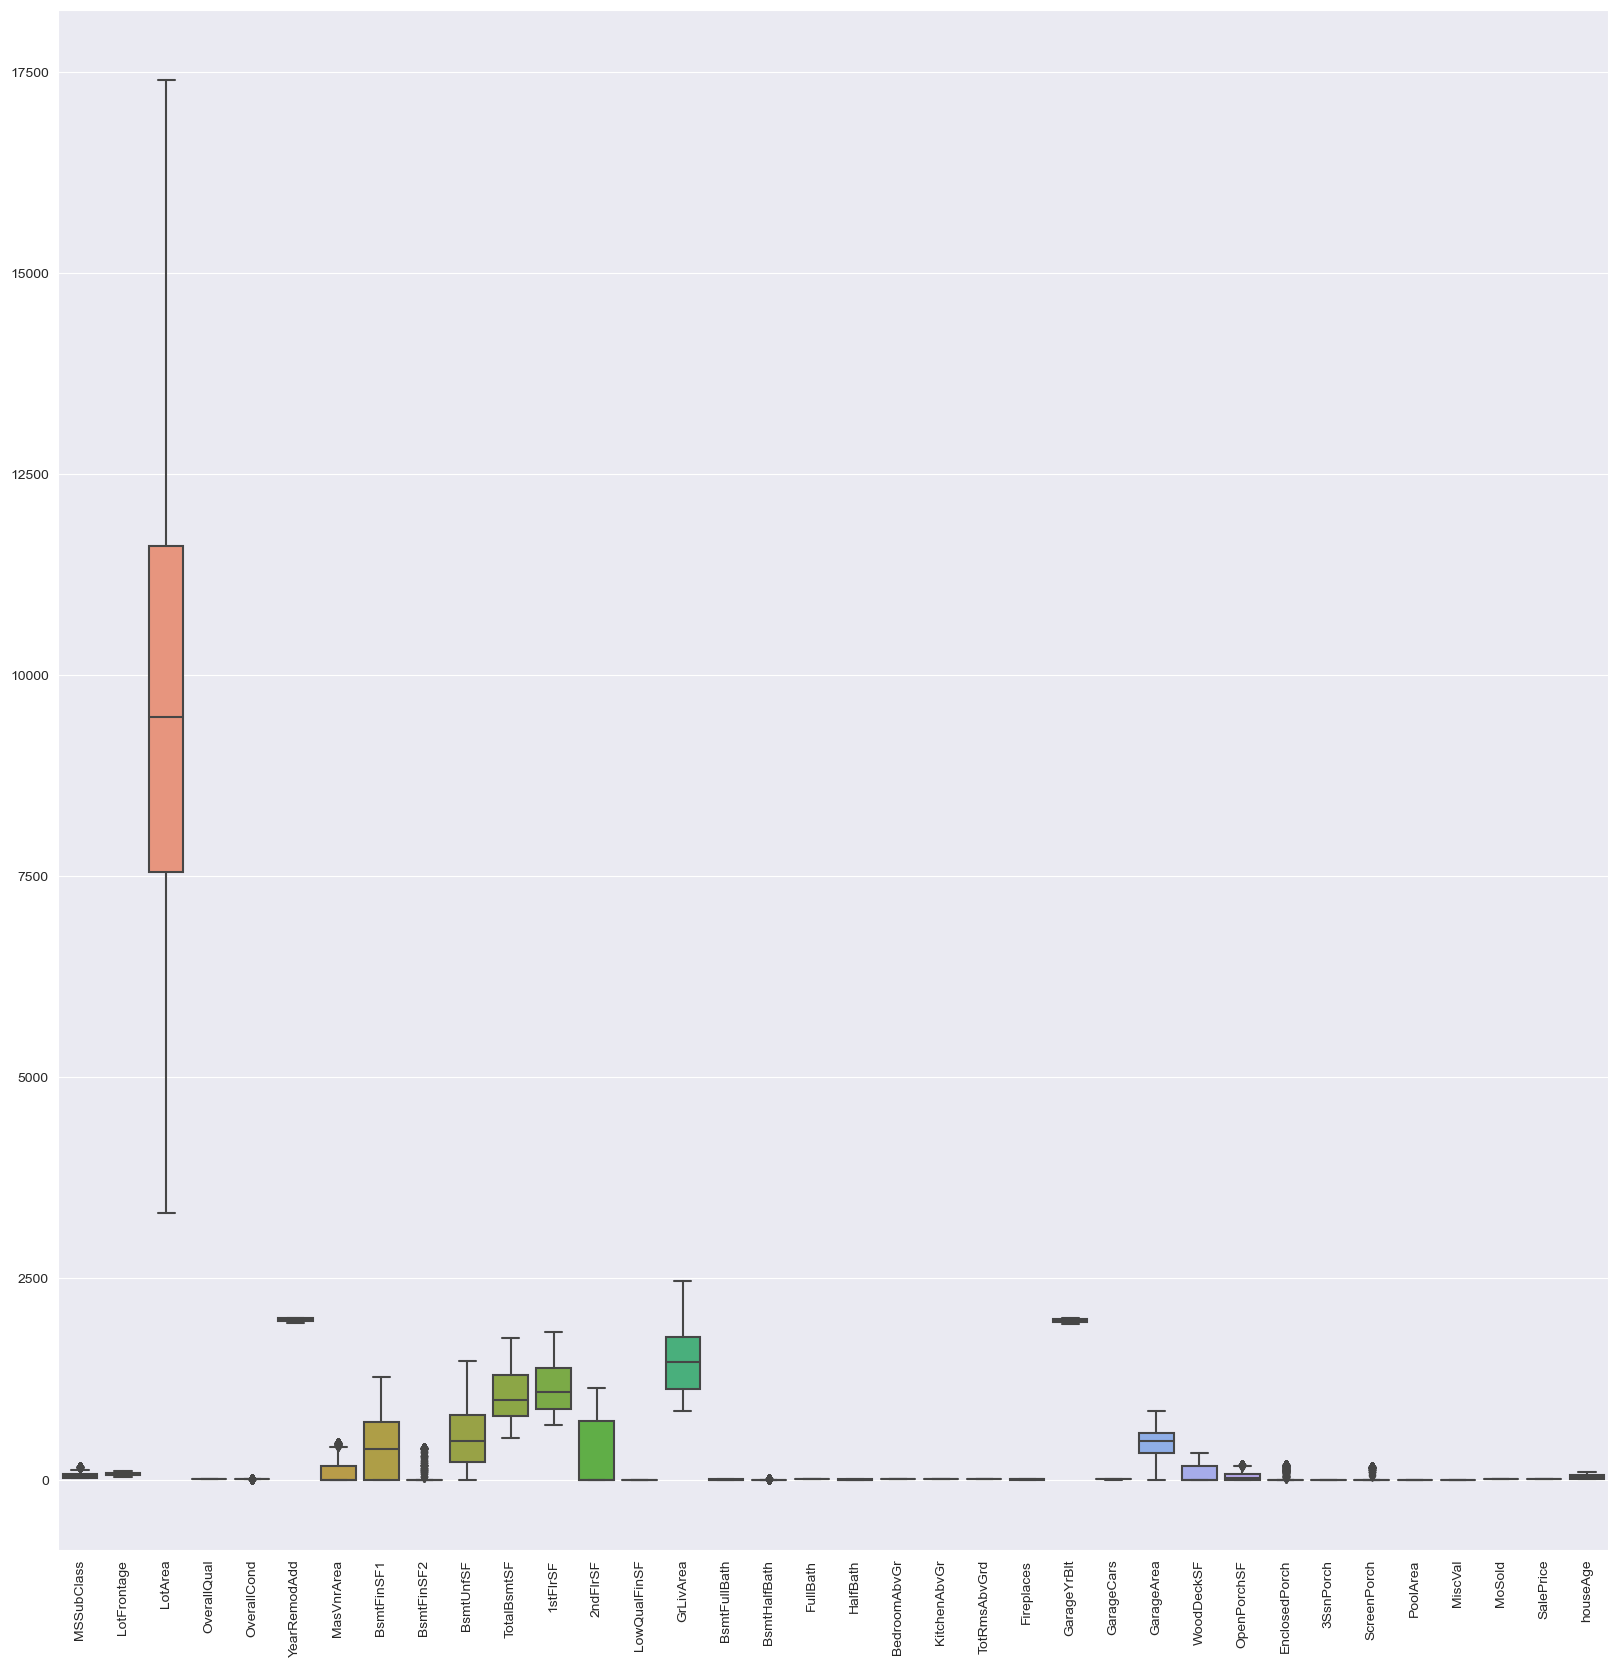

In [4329]:
##Double checking if we have now removed the outliers properly
plt.figure(figsize=[20,20])
plt.xticks(rotation=90)
sns.boxplot(data=housing_numeric)

In [4330]:
housing.drop( housing_numeric.columns, axis=1, inplace=True)
housing = pd.concat([housing, housing_numeric], axis=1)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [4331]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [4332]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)


In [4333]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [4334]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 259 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(13), int64(23), uint8(223)
memory usage: 728.7 KB


In [4335]:
# split into train and test
from sklearn.model_selection import train_test_split


y = housing.pop('SalePrice')
X = housing

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)
  

In [4336]:
#Scaling the feature columns, before using Ridge or Lasso

cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols


## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting housing prices, a dataset using linear regression.


In [4337]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [4338]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.02178247473241
[-7.71416591e-03  4.38312486e-04  2.83574001e-02  4.25779992e-02
  3.79541386e-02  1.93013710e-02 -4.93011847e-03 -8.18908553e-03
 -1.38742961e-02 -2.87703881e-02  7.35331263e-02  2.00136131e-02
  4.28451237e-02 -1.08485089e+11  7.72860577e-02  1.06127571e-02
 -5.21122756e-04  9.44946558e-03  9.00866744e-03  2.15900923e-03
  3.28894073e+10 -1.27959726e-03  4.42964268e-03 -4.73153771e-03
  2.68053241e-03  2.90257375e-02  1.11248125e-02  8.58506241e-03
  4.61826311e-03 -2.53722014e+10  5.40332677e-03  9.21102697e+08
 -1.56527172e+10  1.64645411e-03 -6.93036814e-02  3.59391133e-02
  1.48332512e-02  4.80101718e-02  2.92957099e-02  1.88325194e-04
 -9.64444140e-04 -4.16220463e-04 -1.00458018e-03  3.94087472e-03
 -2.96964774e-03 -1.06917451e-03  3.16470600e-04  1.74562596e-03
 -4.50397789e-03  3.09542027e-03 -5.26451746e-03 -2.47758917e-03
 -4.54009186e-04  2.96899784e-03  1.31491300e-03 -2.88412545e-03
 -1.00804614e-02  7.69217649e-03  4.09698134e-03 -8.80733245e-03
  2.291

In [4339]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9499836511456241
-1.131449828610657e+22
7.280117946731767
4.070545699873015e+23
0.0062329776941196634
1.394022499956512e+21


### The metrics from Linear Regression is pretty bad. The data is overfitting, we will use Ridge or Lasso

## Ridge and Lasso Regression

Let's now try predicting housing prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [4340]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4341]:
#Finding the best alpha
print(ridge_model_cv.best_params_)

{'alpha': 100}


#### Best alpha that we got for Ridge is 100

In [4342]:
#Fitting Ridge model for best alpha
ridge = Ridge(alpha=ridge_model_cv.best_params_["alpha"])

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [4343]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9459439740805046
0.8907804874795375
7.8681121961001725
3.929321528806212
0.006736397428167956
0.013456580578103465


#### The R2 scores between Train and Test is pretty good ( 0.945 and 0.89). 

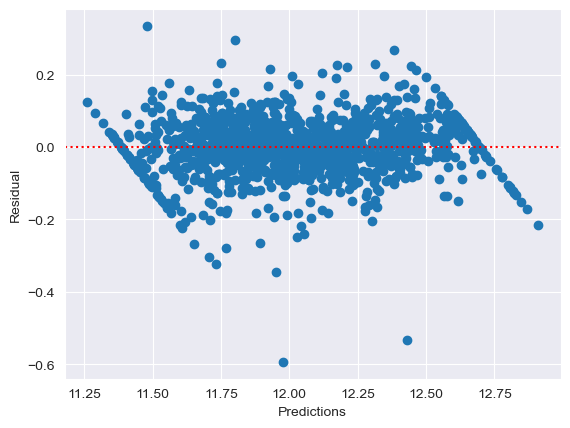

In [4344]:
#Residual Analysis
y_res = y_train - y_pred_train
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

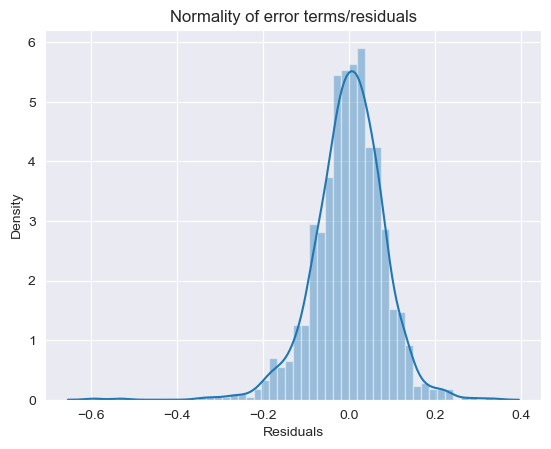

In [4345]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Lasso

In [4346]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##Printing the best hyperparameter alpha


In [4347]:
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


#### The best alpha for Lasso is 0.001

In [4348]:
#Fitting Lasso model for best alpha

lasso = Lasso(alpha=lasso_model_cv.best_params_["alpha"])
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [4349]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9462185840933647
0.8921803813790748
7.828141399975182
3.8789584287469085
0.006702175856143136
0.013284104208037358


#### The R2 scores between Train and Test is pretty good ( 0.946 and 0.892). 

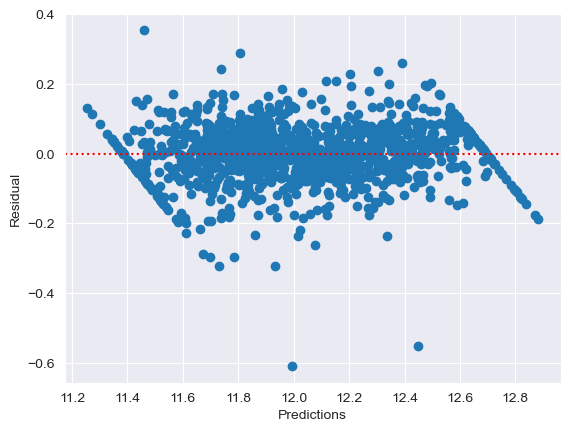

In [4350]:
#Residual Analysis
y_res = y_train - y_pred_train
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

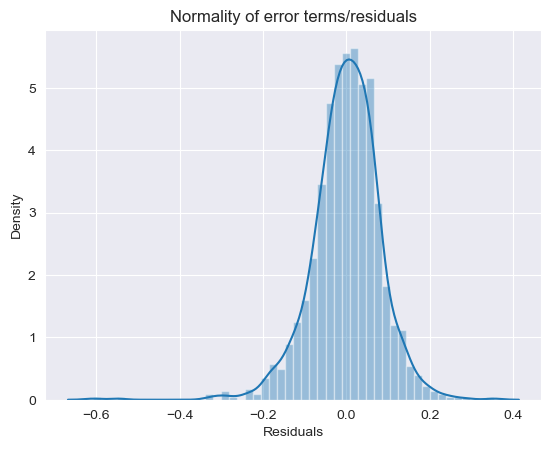

In [4351]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#We see that residuals are pretty much scattered

In [4352]:
# Creating a table which contain all the metrics

headings_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

metric_table = pd.DataFrame(headings_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.945944,0.946219
1,R2 Score (Test),0.890780,0.892180
2,RSS (Train),7.868112,7.828141
3,RSS (Test),3.929322,3.878958
4,MSE (Train),0.082076,0.081867
5,MSE (Test),0.116003,0.115257


## Lets observe the changes in the coefficients after regularization

In [4353]:
betas = pd.DataFrame(index=X_train.columns)

In [4354]:
betas.rows = X_train.columns

In [4355]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [4356]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Ridge,Lasso
MSSubClass,-0.008240,-0.005618
LotFrontage,0.003369,0.000170
LotArea,0.022904,0.026070
OverallQual,0.041300,0.049741
OverallCond,0.030669,0.037623
YearRemodAdd,0.020275,0.019470
MasVnrArea,0.000149,0.000000
BsmtFinSF1,0.019065,0.012705
BsmtFinSF2,0.000989,0.000000
BsmtUnfSF,-0.000257,-0.008582


In [4357]:
print(betas['Ridge'].sort_values(ascending=False))

GrLivArea                0.049274
OverallQual              0.041300
TotalBsmtSF              0.038985
1stFlrSF                 0.032192
OverallCond              0.030669
2ndFlrSF                 0.028598
LotArea                  0.022904
GarageArea               0.022595
Neighborhood_Crawfor     0.021147
YearRemodAdd             0.020275
BsmtFinSF1               0.019065
Condition1_Norm          0.016220
Functional_Typ           0.014907
SaleCondition_Normal     0.014100
HalfBath                 0.013548
Neighborhood_NridgHt     0.012963
FullBath                 0.012949
Exterior1st_BrkFace      0.012838
CentralAir_Y             0.012013
Condition2_PosA          0.012009
MSZoning_FV              0.011402
BsmtFullBath             0.011177
WoodDeckSF               0.010768
Neighborhood_StoneBr     0.010381
BsmtExposure_Gd          0.010266
OpenPorchSF              0.009779
SaleType_ConLD           0.009487
Fireplaces               0.009253
MSZoning_RL              0.009170
GarageCars    

In [4358]:
print(betas['Lasso'].sort_values(ascending=False))

GrLivArea                0.084268
TotalBsmtSF              0.054251
OverallQual              0.049741
OverallCond              0.037623
2ndFlrSF                 0.028755
GarageArea               0.028241
LotArea                  0.026070
Neighborhood_Crawfor     0.025103
YearRemodAdd             0.019470
Functional_Typ           0.016127
Condition1_Norm          0.015888
1stFlrSF                 0.015814
SaleCondition_Normal     0.014141
BsmtFinSF1               0.012705
Neighborhood_NridgHt     0.012630
Exterior1st_BrkFace      0.012175
MSZoning_FV              0.011641
BsmtFullBath             0.011437
Condition2_PosA          0.011205
WoodDeckSF               0.010744
BsmtExposure_Gd          0.010288
CentralAir_Y             0.010015
Neighborhood_StoneBr     0.009457
Neighborhood_BrkSide     0.009371
HalfBath                 0.008997
SaleCondition_Partial    0.008476
Neighborhood_ClearCr     0.008368
OpenPorchSF              0.008051
Fireplaces               0.007281
SaleType_ConLD

## Summary

##### We will chose the Lasso regression as the final model since the metric of R2_score is slightly better compared to Ridge . 
For Lasso R2 Score (Train) = 0.946219 and  R2 Score (Test) 0.892180

#### The following are the top features which influence the SalePrice ( as determined by the Lasso coefficients )

GrLivArea                0.049274
OverallQual              0.041300
TotalBsmtSF              0.038985
1stFlrSF                 0.032192
OverallCond              0.030669
2ndFlrSF                 0.028598
LotArea                  0.022904
GarageArea               0.022595